In [1]:
from PIL import Image
import os
import numpy as np

# 1. 데이터 구조 및 포맷 검증

In [7]:
sub1_labels = ['Eyeclose', 'Neutral', 'Yawn']
labels = ['Eyeclose', 'Happy', 'Neutral', 'Yawn']

In [ ]:
root_dir = "./"
for root, dirs, files in os.walk(root_dir):
    print(root, len(files))

./ 1
./Sub1 0
./Sub1\Eyeclose 157
./Sub1\Neutral 166
./Sub1\Yawn 58
./Sub2 0
./Sub2\Eyeclose 316
./Sub2\Happy 76
./Sub2\Neutral 167
./Sub2\Yawn 51
./Sub3 0
./Sub3\Eyeclose 145
./Sub3\Happy 35
./Sub3\Neutral 88
./Sub3\Yawn 60


각 참가자별로 상태마다 나누어 이미지 분할 저장  

상태는 'Eyeclose', 'Happy', 'Neutral', 'Yawn' 총 4가지  
→ 특이사항으로 1번 참가자는 Happy가 없음 + 2번 참가자는 다른 참가자보다 Eyeclose의 양이 더 많음

In [19]:
for label in sub1_labels:
    sub1_file_list = os.listdir(f"./Sub1/{label}/")
    print(f"Sub1 {label}: {sub1_file_list}")

Sub1 Eyeclose: ['174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '180.jpg', '181.jpg', '182.jpg', '183.jpg', '184.jpg', '185.jpg', '186.jpg', '187.jpg', '188.jpg', '189.jpg', '190.jpg', '191.jpg', '192.jpg', '193.jpg', '194.jpg', '195.jpg', '196.jpg', '197.jpg', '198.jpg', '199.jpg', '200.jpg', '201.jpg', '202.jpg', '203.jpg', '204.jpg', '205.jpg', '206.jpg', '207.jpg', '208.jpg', '209.jpg', '210.jpg', '211.jpg', '212.jpg', '213.jpg', '214.jpg', '215.jpg', '216.jpg', '217.jpg', '218.jpg', '219.jpg', '220.jpg', '221.jpg', '222.jpg', '301.jpg', '302.jpg', '303.jpg', '304.jpg', '305.jpg', '306.jpg', '307.jpg', '308.jpg', '309.jpg', '310.jpg', '311.jpg', '312.jpg', '313.jpg', '314.jpg', '315.jpg', '316.jpg', '317.jpg', '318.jpg', '319.jpg', '320.jpg', '321.jpg', '322.jpg', '323.jpg', '324.jpg', '325.jpg', '326.jpg', '327.jpg', '328.jpg', '329.jpg', '330.jpg', '331.jpg', '332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg', '337.jpg', '338.jpg', '339.jpg', '340.jpg', '341.

In [20]:
for label in labels:
    sub2_file_list = os.listdir(f"./Sub2/{label}/")
    sub3_file_list = os.listdir(f"./Sub3/{label}/")
    print(f"Sub2 {label}: {sub2_file_list}")
    print(f"Sub3 {label}: {sub3_file_list}")

Sub2 Eyeclose: ['1077.jpg', '1078.jpg', '1079.jpg', '1080.jpg', '1081.jpg', '1082.jpg', '1083.jpg', '1084.jpg', '1085.jpg', '1086.jpg', '1087.jpg', '1088.jpg', '1089.jpg', '1090.jpg', '1091.jpg', '1092.jpg', '1093.jpg', '1094.jpg', '1095.jpg', '1096.jpg', '1097.jpg', '1098.jpg', '1099.jpg', '1100.jpg', '1101.jpg', '1102.jpg', '1103.jpg', '1104.jpg', '1105.jpg', '1106.jpg', '1107.jpg', '1108.jpg', '1109.jpg', '1110.jpg', '1111.jpg', '1112.jpg', '1113.jpg', '1114.jpg', '1115.jpg', '1116.jpg', '1117.jpg', '1118.jpg', '1119.jpg', '1120.jpg', '1121.jpg', '1122.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1126.jpg', '1127.jpg', '1128.jpg', '1129.jpg', '1130.jpg', '1131.jpg', '1132.jpg', '1133.jpg', '1134.jpg', '1135.jpg', '1136.jpg', '1137.jpg', '1138.jpg', '1139.jpg', '1140.jpg', '1141.jpg', '1142.jpg', '1143.jpg', '1144.jpg', '1145.jpg', '1146.jpg', '1147.jpg', '1148.jpg', '1149.jpg', '1150.jpg', '1151.jpg', '1152.jpg', '1153.jpg', '1154.jpg', '1155.jpg', '1156.jpg', '1157.jpg', '1158.jpg', 

# 2. 데이터 품질 점검

In [15]:
broken_files = []
sub1_size_list = []
sub2_size_list = []
sub3_size_list = []

for label in sub1_labels:
       for fname in os.listdir(f"./Sub1/{label}/"):
              try:
                     img = Image.open(f"./Sub1/{label}/" + fname)
                     sub1_size_list.append(f'({img.size[0]}, {img.size[1]})')
                     img.verify()
              except:
                     broken_files.append(fname)

for label in labels:
       for fname in os.listdir(f"./Sub2/{label}/"):
              try:
                     img = Image.open(f"./Sub2/{label}/" + fname)
                     sub2_size_list.append(f'({img.size[0]}, {img.size[1]})')
                     img.verify()
              except:
                     broken_files.append(fname)

for label in labels:
       for fname in os.listdir(f"./Sub3/{label}/"):
              try:
                     img = Image.open(f"./Sub3/{label}/" + fname)
                     sub3_size_list.append(f'({img.size[0]}, {img.size[1]})')
                     img.verify()
              except:
                     broken_files.append(fname)

print("Broken files:", broken_files)

Broken files: []


In [17]:
print(np.unique(sub1_size_list, return_counts=True))
print(np.unique(sub2_size_list, return_counts=True))
print(np.unique(sub3_size_list, return_counts=True))

(array(['(1920, 1080)'], dtype='<U12'), array([381], dtype=int64))
(array(['(1920, 1080)'], dtype='<U12'), array([610], dtype=int64))
(array(['(1920, 1080)'], dtype='<U12'), array([328], dtype=int64))


손상된 파일은 없고, 전체 이미지는 (1920x1080) 해상도로 통일되어있음.

# 라이선스 명시 확인

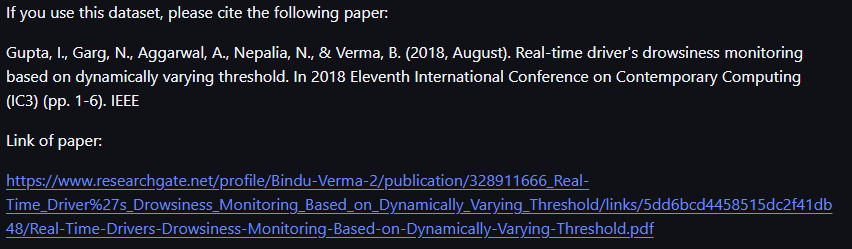

이 데이터셋을 사용할 때는 반드시 라이선스 명시(레퍼런스 출처 표기)를 해주어야 함.